# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [72]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

**Step 2:** Load the dataset _(done for you)_.

In [73]:

iris_data = load_iris()


In [74]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df.columns = [column.replace("(cm)", "").strip() for column in df.columns]
    df["target"] = iris_data.target
    df["class"] = iris_data.target_names[iris_data.target]
    return df

df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
76,6.8,2.8,4.8,1.4,1,versicolor
101,5.8,2.7,5.1,1.9,2,virginica
88,5.6,3.0,4.1,1.3,1,versicolor
41,4.5,2.3,1.3,0.3,0,setosa
85,6.0,3.4,4.5,1.6,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
79,5.7,2.6,3.5,1.0,1,versicolor
30,4.8,3.1,1.6,0.2,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica


In [75]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [76]:

#From our data we will only get variable columns as np.array
x = 0
### BEGIN SOLUTION
x = df_iris.values[:,:4]
### END SOLUTIONS

In [77]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [78]:
mergings = 0 
### BEGIN SOLUTION
mergings = linkage(x, 'complete')
print(mergings.shape)
### END SOLUTION

(149, 4)


In [79]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

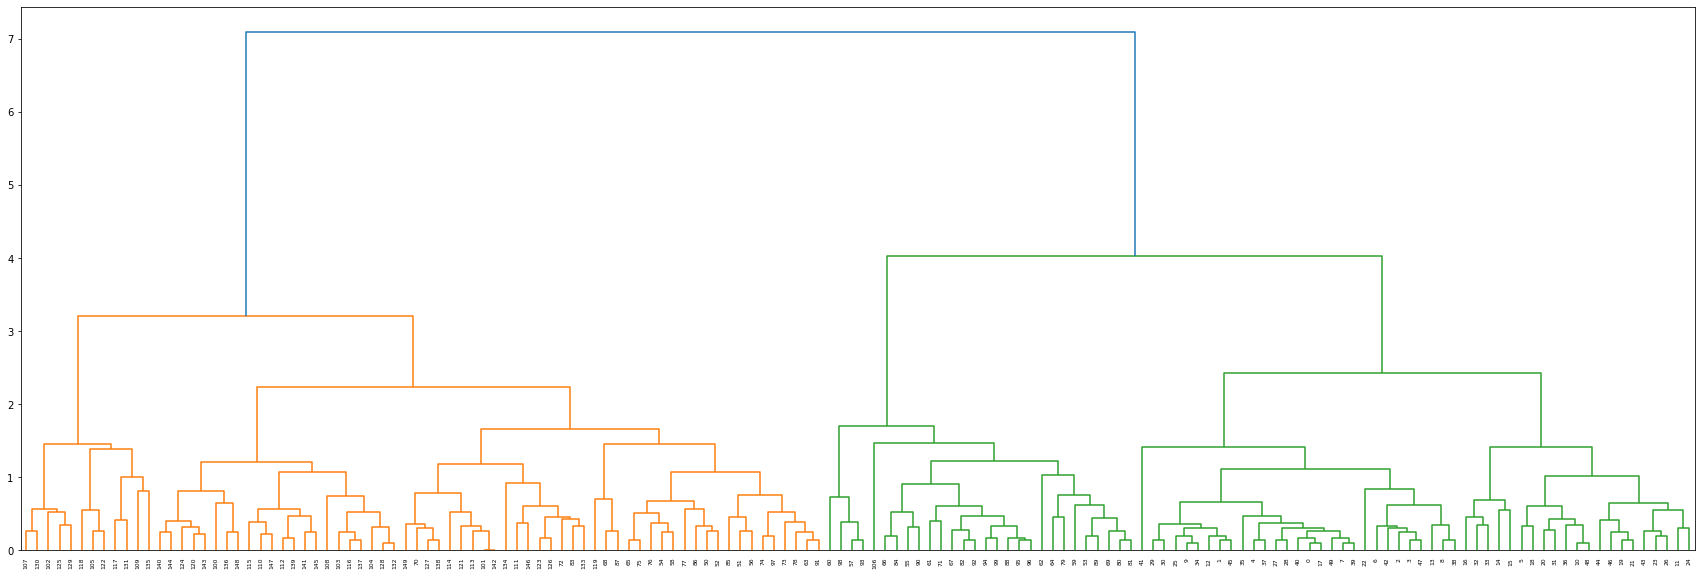

In [80]:
dn = 0
### BEGIN SOLUTION
fig = plt.figure(figsize=(30, 10))
dn = dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()
# END SOLUTION

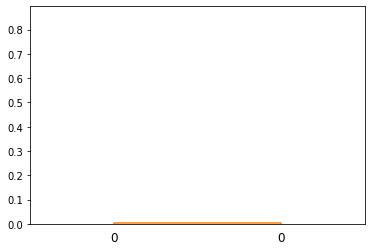

In [81]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [82]:
from sklearn.cluster import KMeans
df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values
new_df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [83]:
model = 0
### BEGIN SOLUTION
model = KMeans(n_clusters=3)
### END SOLUTION

In [84]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [85]:
### BEGIN SOLUTION
model = model.fit(points)
### END SOLUTION

In [86]:
# Centroids
centroids = model.cluster_centers_

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [87]:
### BEGIN SOLUTION
labels = model.predict(points)
### END SOLUTION

In [88]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [89]:
labels

array([0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [90]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    # raise NotImplementedError()
    for index in range(labels.shape[0]):
        if labels[index] == 0:
            data_0.append(points[index])
        elif labels[index] == 1:
            data_1.append(points[index])
        elif labels[index] == 2:
            data_2.append(points[index])
            
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
            
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111, 2)
(95, 2)
(94, 2)


In [91]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

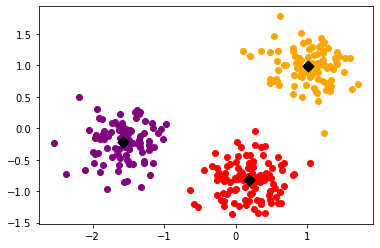

In [92]:
# plotting the data 

### BEGIN SOLUTION
#Plotting the results
plt.scatter(data_0[:,0] , data_0[:,1] , color = 'red')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.scatter(data_1[:,0] , data_1[:,1] , color = 'purple')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.scatter(data_2[:,0] , data_2[:,1] , color = 'orange')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.show()

### END SOLUTION

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [93]:

### BEGIN SOLUTION
new_labels = model.predict(new_points)
### END SOLUTION


In [94]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [95]:
#separate the data by labels like we did before
### BEGIN SOLUTION
new_0, new_1, new_2 = separate_labels(new_labels, new_points)
### END SOLUTION


In [96]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

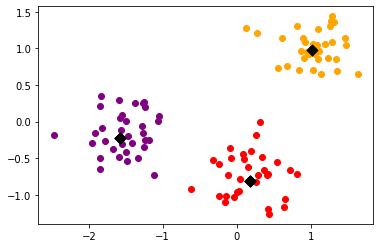

In [97]:
#plot the new labels


### BEGIN SOLUTION
plt.scatter(new_0[:,0] , new_0[:,1] , color = 'red')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.scatter(new_1[:,0] , new_1[:,1] , color = 'purple')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.scatter(new_2[:,0] , new_2[:,1] , color = 'orange')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'k', marker='D')
plt.show()
### END SOLUTION

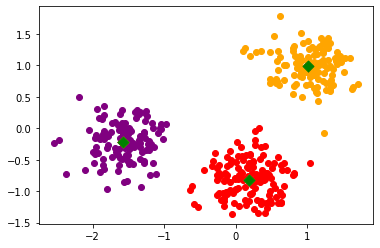

In [98]:
#plot all the points together

### BEGIN SOLUTION
plt.scatter(data_0[:,0] , data_0[:,1] , color = 'red')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'blue', marker='D')
plt.scatter(data_1[:,0] , data_1[:,1] , color = 'purple')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'white', marker='D')
plt.scatter(data_2[:,0] , data_2[:,1] , color = 'orange')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'red', marker='D')
plt.scatter(new_0[:,0] , new_0[:,1] , color = 'red')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'black', marker='D')
plt.scatter(new_1[:,0] , new_1[:,1] , color = 'purple')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'orange', marker='D')
plt.scatter(new_2[:,0] , new_2[:,1] , color = 'orange')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'green', marker='D')

plt.show()

### END SOLUTION